# Exploração de Dados das Tabelas

Neste notebook, realizaremos uma exploração detalhada dos dados obtidos por aparelho e por dia. O objetivo é comparar os resultados entre os diferentes dispositivos e analisar as diferenças entre eles. Vamos visualizar esses dados de diversas maneiras e extrair insights relevantes para nossa análise.

## Objetivos:
- Comparar os resultados dos diferentes aparelhos.
- Analisar as diferenças entre os dados coletados por cada dispositivo.
- Visualizar os dados de forma estratificada para identificar padrões ou tendências.

## Etapas de Exploração:
1. Carregamento e pré-processamento dos dados.
2. Análise estatística descritiva.
3. Visualização dos dados por meio de gráficos e plots.
4. Comparação entre os aparelhos e os dias.
5. Identificação de diferenças significativas.
6. Exploração de correlações entre as variáveis.
7. Análise de tendências ao longo do tempo.
8. Extração de insights e conclusões.

## Por que explorar os dados de forma atomizada?
Ao explorar os dados de forma atomizada, ou seja, analisando cada aparelho e dia separadamente, podemos identificar padrões e variações específicas de cada dispositivo. Isso nos permite entender melhor o desempenho de cada aparelho em diferentes condições e contextos, além de nos ajudar a detectar possíveis problemas ou anomalias em determinados dias ou momentos.

## Por que comparar os resultados em dias diferentes e aparelhos diferentes?
A comparação entre os resultados em dias diferentes nos permite avaliar a consistência dos dados ao longo do tempo e identificar possíveis variações sazonais ou tendências. Por outro lado, a comparação entre os aparelhos nos ajuda a entender como diferentes dispositivos se comportam em situações semelhantes e a identificar possíveis disparidades ou discrepâncias entre eles.

## Por que visualizar os dados de forma estratificada?
A visualização dos dados de forma estratificada nos permite identificar padrões e tendências que podem estar ocultos em uma análise agregada. Ao segmentar os dados por diferentes variáveis, como hora do dia, localização ou condições ambientais, podemos obter insights mais detalhados sobre o comportamento dos dispositivos e as relações entre as variáveis.

Vamos começar nossa jornada de exploração de dados e descobrir o que podemos aprender com essas informações!


_____
## Importação de Bibliotecas e Código

Nesta seção, importaremos as bibliotecas necessárias para nossa análise exploratória de dados e escreveremos o código para carregar e processar os dados.
Vamos começar importando as bibliotecas:


In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## Importação dos Arquivos JSON

Nesta etapa, vamos importar os dados JSON dos quatro aparelhos em dois dias para realizar nossa análise exploratória de dados. Os dados serão carregados e armazenados em estruturas de dados apropriadas para facilitar a análise.


In [4]:
# Nome do arquivo JSON
arquivo_json = "Dataset_Vetor.json"
print("Carregando o arquivo JSON: #{arquivo_json}\n")

# Carregar os dados do arquivo JSON
with open(arquivo_json, "r") as arquivo:
    dados = json.load(arquivo)

# Converter os dados em um DataFrame
df_dataset_vetor = pd.DataFrame(dados)

# Exibir as primeiras linhas do DataFrame
print(df_dataset_vetor.head())

Carregando o arquivo JSON: #{arquivo_json}

   altitude  accuracy     speed     bearing  timestamp  \
0     432.5       3.8  0.136401  353.619995   0.335475   
1     428.6       2.0  0.111695  294.940002   0.335486   
2     427.5       1.7  0.112209  293.640015   0.335498   
3     429.1       2.0  0.086988  277.720001   0.335509   
4     430.0       1.8  0.050443   90.730003   0.335521   

   diferencalatitudeMetros  diferencalongitudeMetros  constellationType1-svid  \
0                    -4.67                     -1.84                       10   
1                    -3.56                     -1.84                       10   
2                    -2.82                      0.57                       10   
3                    -3.37                      1.50                       10   
4                    -3.19                      1.69                       10   

   constellationType1-svid21-azimuthDegrees  \
0                                     205.0   
1                         

In [5]:
# Certifique-se de que o arquivo JSON foi carregado
if 'dados' not in locals():
	arquivo_json = "Dataset_Vetor.json"
	with open(arquivo_json, "r") as arquivo:
		dados = json.load(arquivo)

# Exibir a estrutura do primeiro objeto da lista contida no JSON
primeiro_objeto = dados[0]
print("Estrutura do primeiro objeto da lista:\n")
print(json.dumps(primeiro_objeto, indent=4, ensure_ascii=False))

Estrutura do primeiro objeto da lista:

{
    "altitude": 432.5,
    "accuracy": 3.799999952316284,
    "speed": 0.13640138506889343,
    "bearing": 353.6199951171875,
    "timestamp": 0.33547453703703706,
    "diferencalatitudeMetros": -4.67,
    "diferencalongitudeMetros": -1.84,
    "constellationType1-svid": 10,
    "constellationType1-svid21-azimuthDegrees": 205,
    "constellationType1-svid21-elevationDegrees": 56,
    "constellationType1-svid21-cn0DbHz": 42.79999923706055,
    "constellationType1-svid21-basebandCn0DbHz": 39.29999923706055,
    "constellationType1-svid21-carrierFrequencyHz": 1575420032,
    "constellationType1-svid8-azimuthDegrees": 310,
    "constellationType1-svid8-elevationDegrees": 49,
    "constellationType1-svid8-cn0DbHz": 33.900001525878906,
    "constellationType1-svid8-basebandCn0DbHz": 30.399999618530273,
    "constellationType1-svid8-carrierFrequencyHz": 1575420032,
    "constellationType1-svid2-azimuthDegrees": 212,
    "constellationType1-svid2-eleva

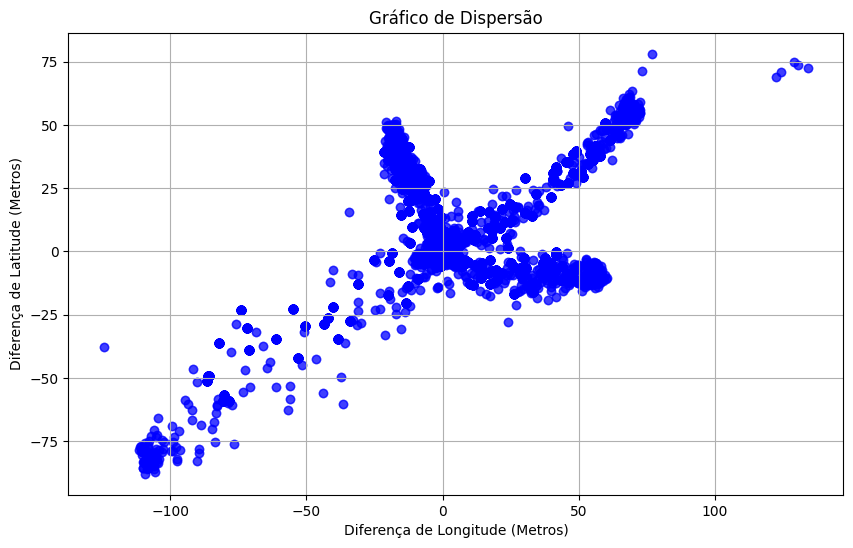

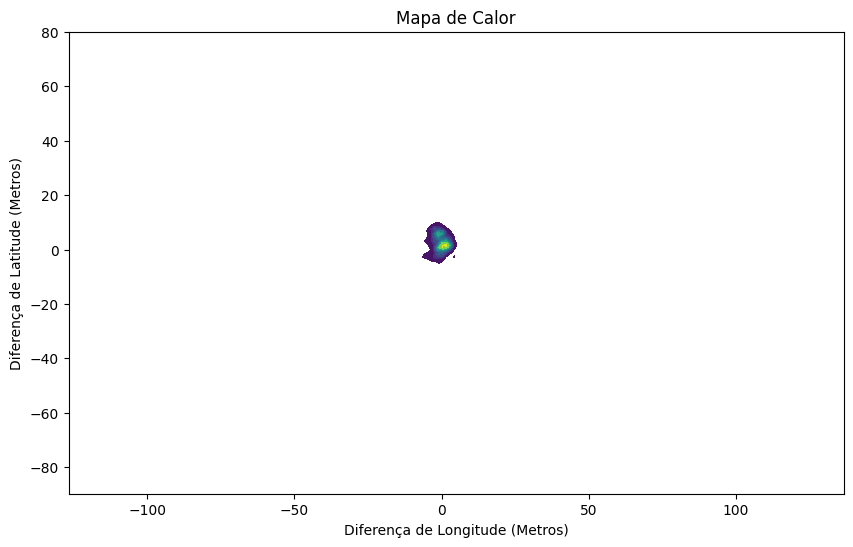

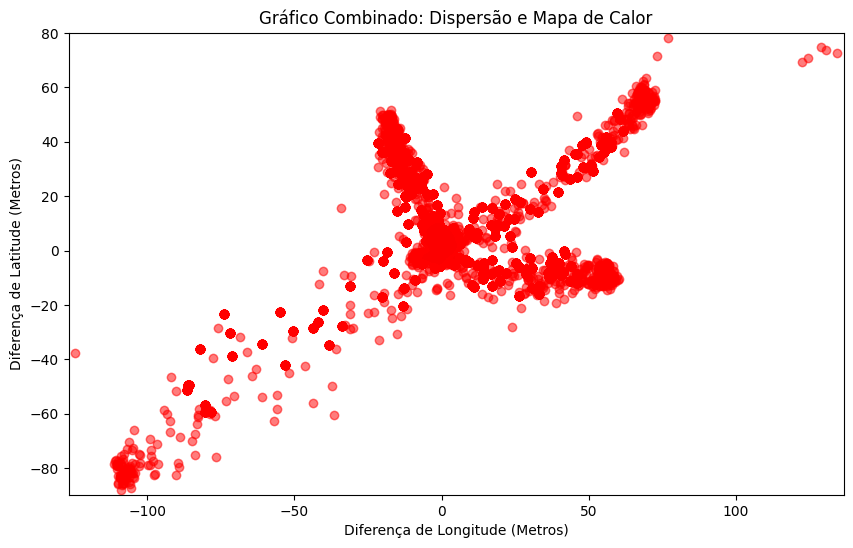

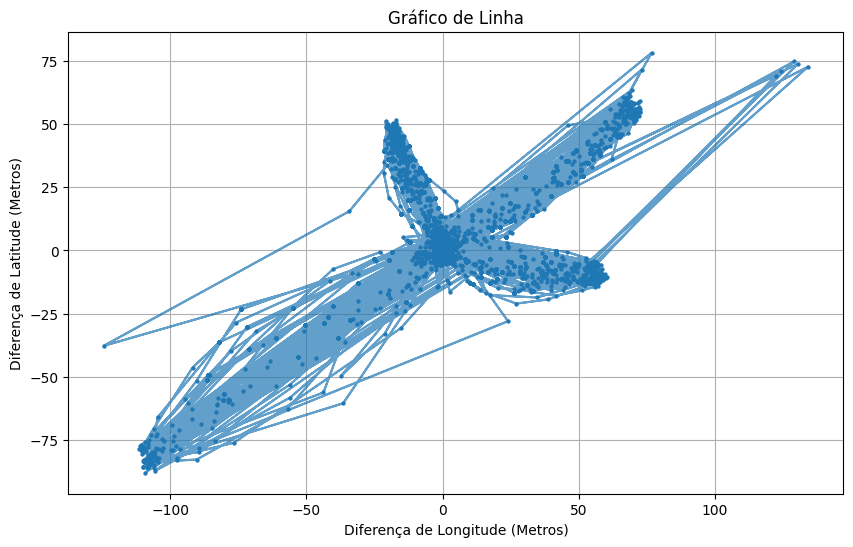

In [7]:
# Gráfico de dispersão (scatter plot) com pontos
plt.figure(figsize=(10, 6))
plt.scatter(df_dataset_vetor['diferencalongitudeMetros'], df_dataset_vetor['diferencalatitudeMetros'], alpha=0.5, c='blue')
plt.title('Gráfico de Dispersão')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.grid(True)
plt.show()

# Mapa de calor (heatmap) com densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df_dataset_vetor['diferencalongitudeMetros'], 
    y=df_dataset_vetor['diferencalatitudeMetros'], 
    cmap="viridis", fill=True
)
plt.title('Mapa de Calor')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.show()

# Gráfico combinado: Dispersão com mapa de calor
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df_dataset_vetor['diferencalongitudeMetros'], 
    y=df_dataset_vetor['diferencalatitudeMetros'], 
    cmap="viridis", fill=True, alpha=0.7
)
plt.scatter(df_dataset_vetor['diferencalongitudeMetros'], df_dataset_vetor['diferencalatitudeMetros'], alpha=0.3, c='red')
plt.title('Gráfico Combinado: Dispersão e Mapa de Calor')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.show()

# Gráfico de linha para observar tendências
plt.figure(figsize=(10, 6))
plt.plot(df_dataset_vetor['diferencalongitudeMetros'], df_dataset_vetor['diferencalatitudeMetros'], alpha=0.7, linestyle='-', marker='o', markersize=2)
plt.title('Gráfico de Linha')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.grid(True)
plt.show()

In [10]:
# Contar registros com velocidade igual a 0
count_speed_zero = df_dataset_vetor[df_dataset_vetor['speed'] == 0].shape[0]

# Contar registros com velocidade maior que 0
count_speed_nonzero = df_dataset_vetor[df_dataset_vetor['speed'] > 0].shape[0]

print(f"Registros com velocidade igual a 0: {count_speed_zero}")
print(f"Registros com velocidade maior que 0: {count_speed_nonzero}")

Registros com velocidade igual a 0: 415474
Registros com velocidade maior que 0: 4404


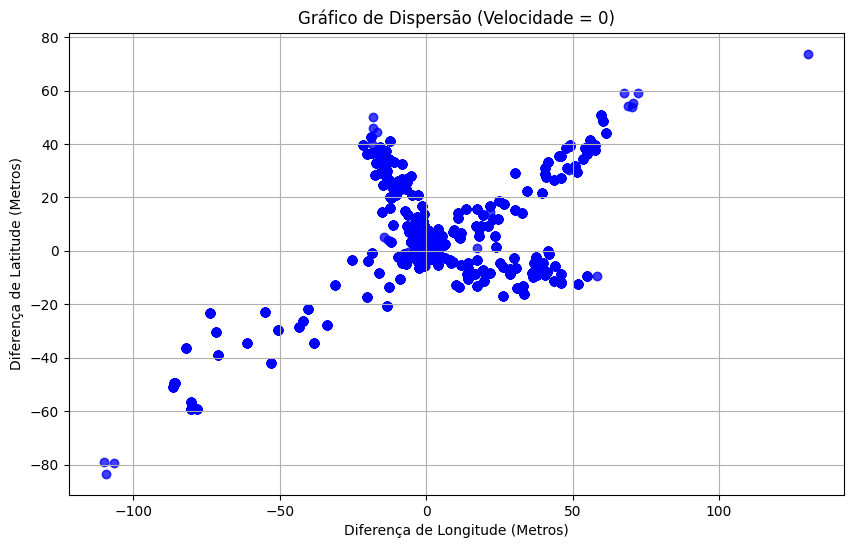

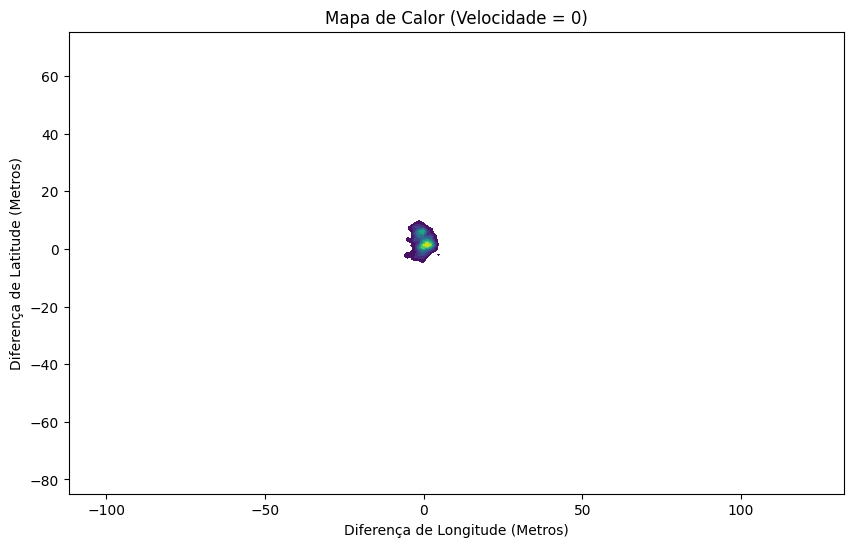

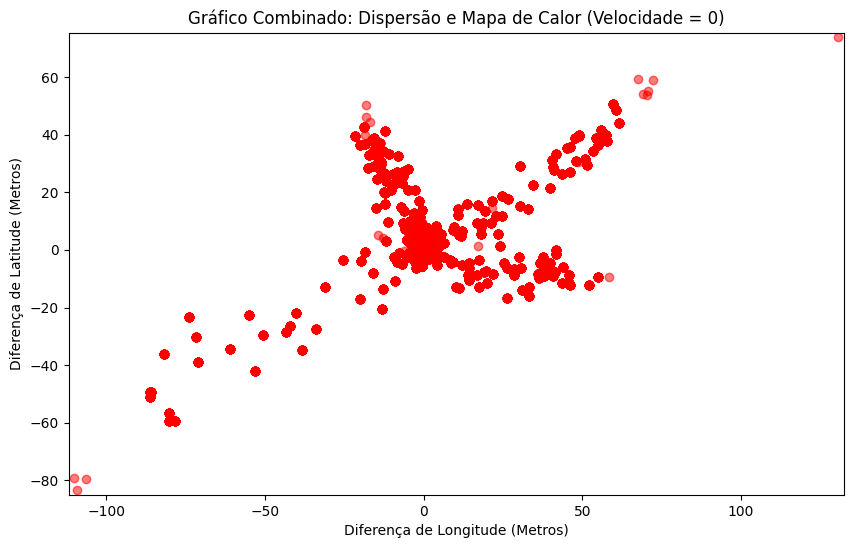

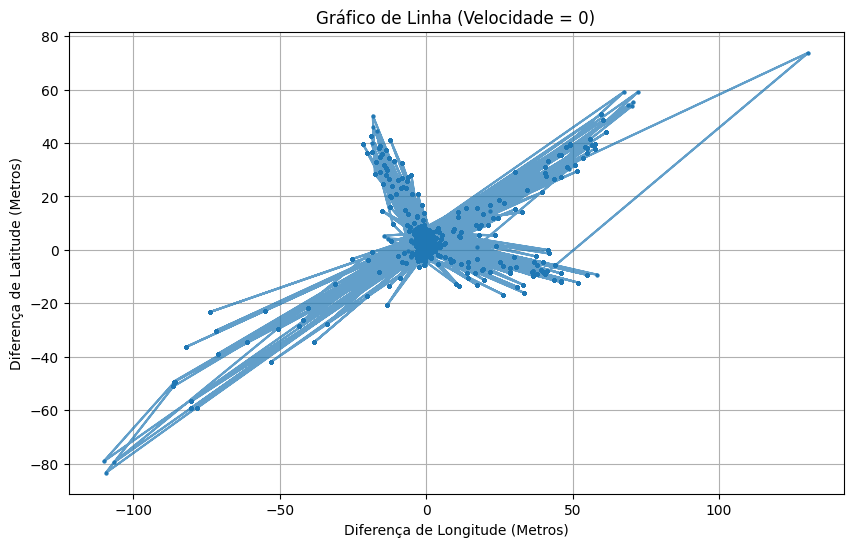

In [12]:
# Filtrar os dados onde a velocidade é 0
df_speed_zero = df_dataset_vetor[df_dataset_vetor['speed'] == 0]

# Gráfico de dispersão (scatter plot) com pontos
plt.figure(figsize=(10, 6))
plt.scatter(df_speed_zero['diferencalongitudeMetros'], df_speed_zero['diferencalatitudeMetros'], alpha=0.5, c='blue')
plt.title('Gráfico de Dispersão (Velocidade = 0)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.grid(True)
plt.show()

# Mapa de calor (heatmap) com densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df_speed_zero['diferencalongitudeMetros'], 
    y=df_speed_zero['diferencalatitudeMetros'], 
    cmap="viridis", fill=True
)
plt.title('Mapa de Calor (Velocidade = 0)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.show()

# Gráfico combinado: Dispersão com mapa de calor
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df_speed_zero['diferencalongitudeMetros'], 
    y=df_speed_zero['diferencalatitudeMetros'], 
    cmap="viridis", fill=True, alpha=0.7
)
plt.scatter(df_speed_zero['diferencalongitudeMetros'], df_speed_zero['diferencalatitudeMetros'], alpha=0.3, c='red')
plt.title('Gráfico Combinado: Dispersão e Mapa de Calor (Velocidade = 0)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.show()

# Gráfico de linha para observar tendências
plt.figure(figsize=(10, 6))
plt.plot(df_speed_zero['diferencalongitudeMetros'], df_speed_zero['diferencalatitudeMetros'], alpha=0.7, linestyle='-', marker='o', markersize=2)
plt.title('Gráfico de Linha (Velocidade = 0)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.grid(True)
plt.show()

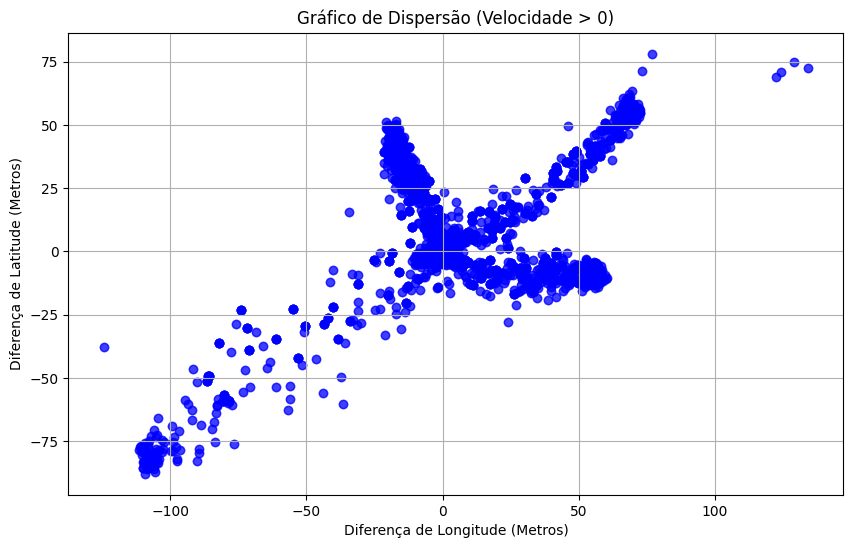

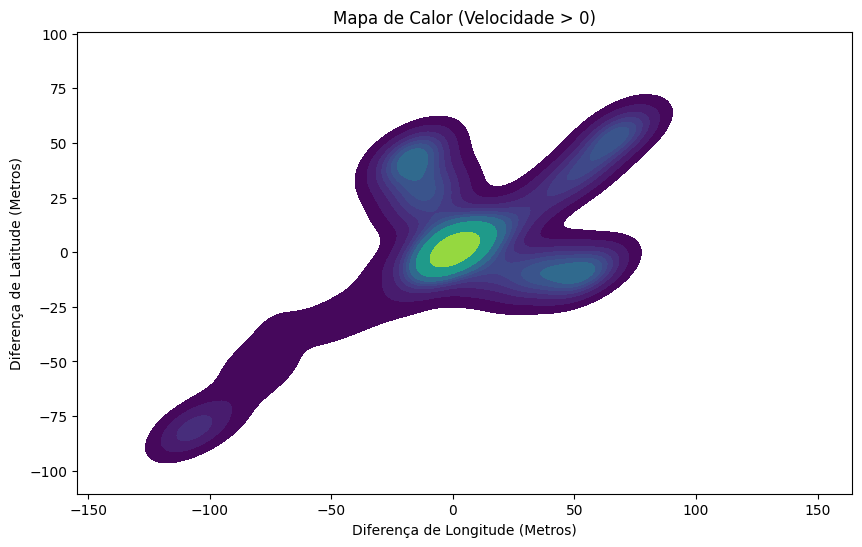

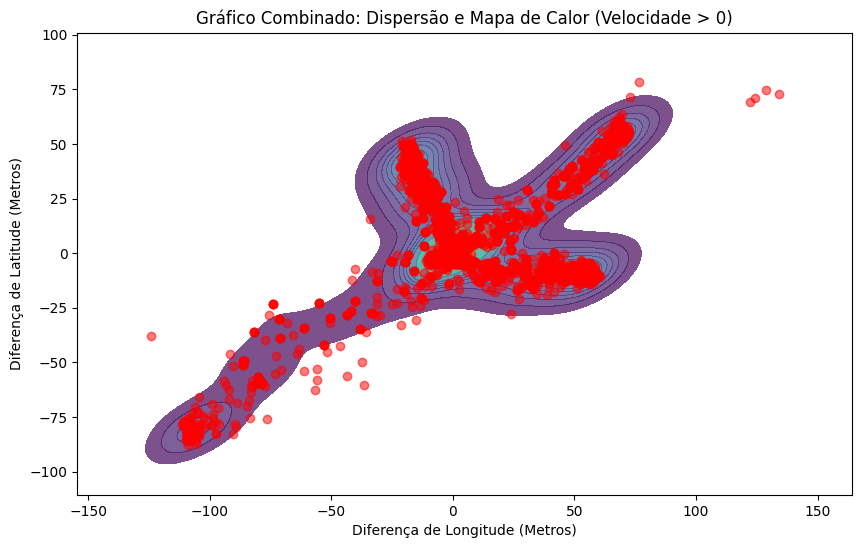

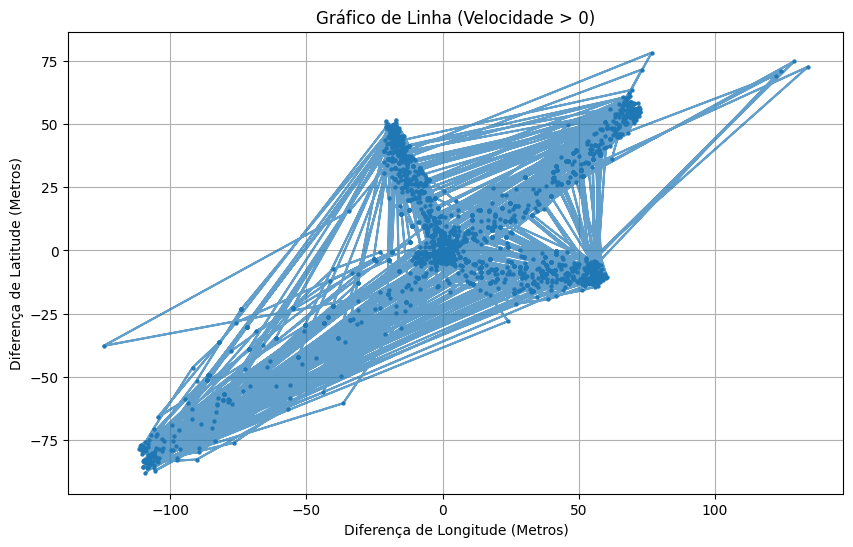

In [9]:
# Filtrar os dados onde a velocidade é maior que 0
df_speed_nonzero = df_dataset_vetor[df_dataset_vetor['speed'] > 0]

# Gráfico de dispersão (scatter plot) com pontos
plt.figure(figsize=(10, 6))
plt.scatter(df_speed_nonzero['diferencalongitudeMetros'], df_speed_nonzero['diferencalatitudeMetros'], alpha=0.5, c='blue')
plt.title('Gráfico de Dispersão (Velocidade > 0)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.grid(True)
plt.show()

# Mapa de calor (heatmap) com densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df_speed_nonzero['diferencalongitudeMetros'], 
    y=df_speed_nonzero['diferencalatitudeMetros'], 
    cmap="viridis", fill=True
)
plt.title('Mapa de Calor (Velocidade > 0)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.show()

# Gráfico combinado: Dispersão com mapa de calor
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df_speed_nonzero['diferencalongitudeMetros'], 
    y=df_speed_nonzero['diferencalatitudeMetros'], 
    cmap="viridis", fill=True, alpha=0.7
)
plt.scatter(df_speed_nonzero['diferencalongitudeMetros'], df_speed_nonzero['diferencalatitudeMetros'], alpha=0.3, c='red')
plt.title('Gráfico Combinado: Dispersão e Mapa de Calor (Velocidade > 0)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.show()

# Gráfico de linha para observar tendências
plt.figure(figsize=(10, 6))
plt.plot(df_speed_nonzero['diferencalongitudeMetros'], df_speed_nonzero['diferencalatitudeMetros'], alpha=0.7, linestyle='-', marker='o', markersize=2)
plt.title('Gráfico de Linha (Velocidade > 0)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.grid(True)
plt.show()

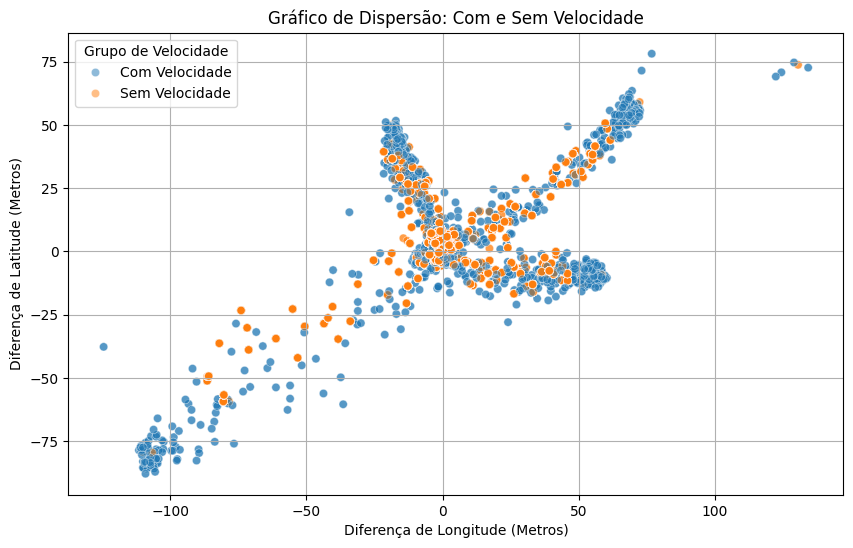

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


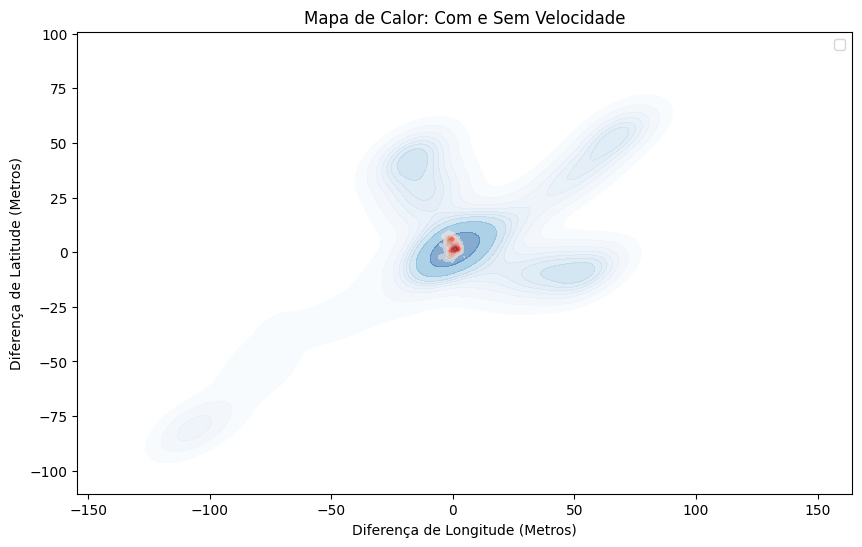

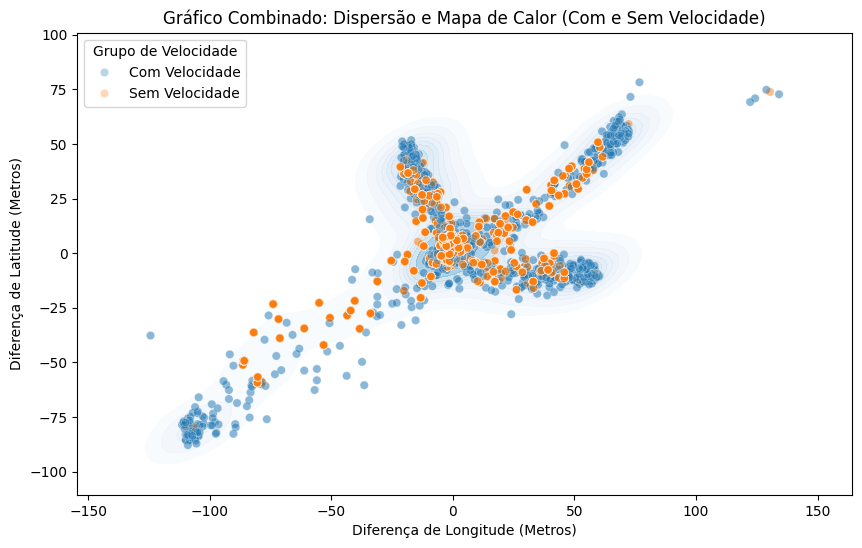

In [11]:
# Adicionar uma coluna para identificar os grupos
df_dataset_vetor['speed_group'] = np.where(df_dataset_vetor['speed'] > 0, 'Com Velocidade', 'Sem Velocidade')

# Gráfico de dispersão (scatter plot) com pontos diferenciados por grupo
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_dataset_vetor,
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    hue='speed_group',
    alpha=0.5
)
plt.title('Gráfico de Dispersão: Com e Sem Velocidade')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.legend(title='Grupo de Velocidade')
plt.grid(True)
plt.show()

# Mapa de calor (heatmap) com densidade diferenciada por grupo
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_dataset_vetor[df_dataset_vetor['speed'] > 0],
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    cmap="Blues",
    fill=True,
    alpha=0.5,
    label='Com Velocidade'
)
sns.kdeplot(
    data=df_dataset_vetor[df_dataset_vetor['speed'] == 0],
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    cmap="Reds",
    fill=True,
    alpha=0.5,
    label='Sem Velocidade'
)
plt.title('Mapa de Calor: Com e Sem Velocidade')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.legend()
plt.show()

# Gráfico combinado: Dispersão com mapa de calor para ambos os grupos
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_dataset_vetor[df_dataset_vetor['speed'] > 0],
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    cmap="Blues",
    fill=True,
    alpha=0.5
)
sns.kdeplot(
    data=df_dataset_vetor[df_dataset_vetor['speed'] == 0],
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    cmap="Reds",
    fill=True,
    alpha=0.5
)
sns.scatterplot(
    data=df_dataset_vetor,
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    hue='speed_group',
    alpha=0.3
)
plt.title('Gráfico Combinado: Dispersão e Mapa de Calor (Com e Sem Velocidade)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.legend(title='Grupo de Velocidade')
plt.show()


TEMPO


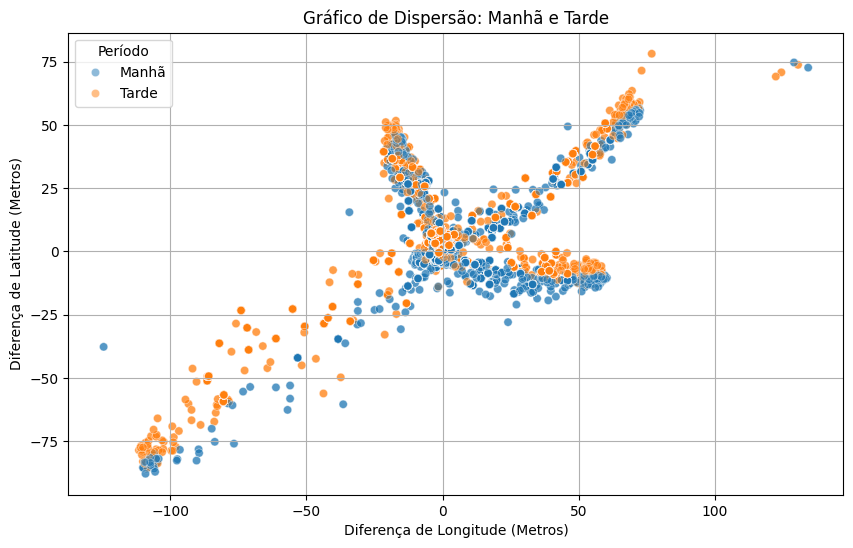

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


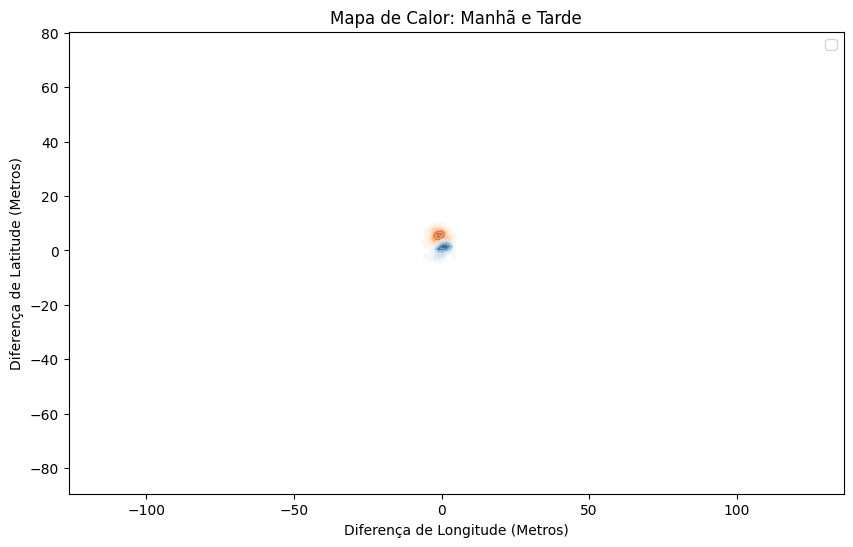

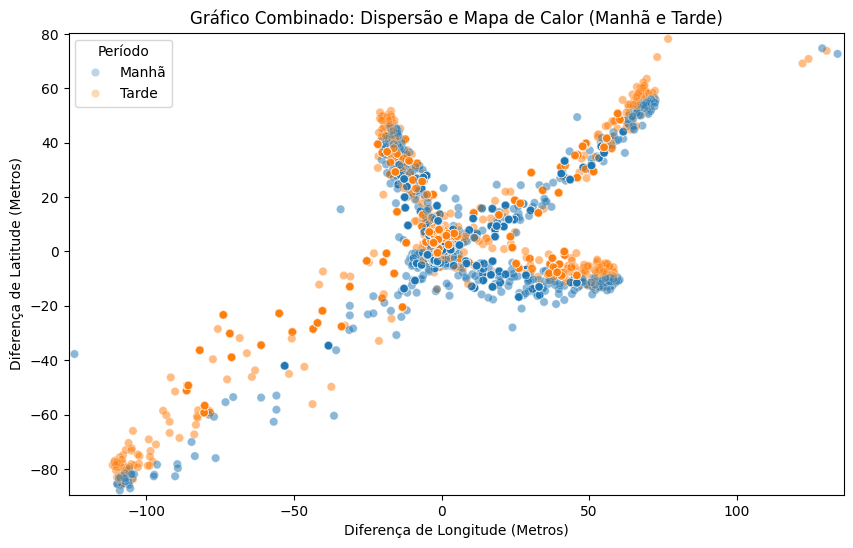

In [13]:
# Adicionar uma coluna para identificar os períodos (manhã e tarde)
df_dataset_vetor['periodo'] = np.where(df_dataset_vetor['timestamp'] > 0.5, 'Tarde', 'Manhã')

# Gráfico de dispersão (scatter plot) com pontos diferenciados por período
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_dataset_vetor,
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    hue='periodo',
    alpha=0.5
)
plt.title('Gráfico de Dispersão: Manhã e Tarde')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.legend(title='Período')
plt.grid(True)
plt.show()

# Mapa de calor (heatmap) com densidade diferenciada por período
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_dataset_vetor[df_dataset_vetor['timestamp'] > 0.5],
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    cmap="Oranges",
    fill=True,
    alpha=0.5,
    label='Tarde'
)
sns.kdeplot(
    data=df_dataset_vetor[df_dataset_vetor['timestamp'] <= 0.5],
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    cmap="Blues",
    fill=True,
    alpha=0.5,
    label='Manhã'
)
plt.title('Mapa de Calor: Manhã e Tarde')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.legend()
plt.show()

# Gráfico combinado: Dispersão com mapa de calor para ambos os períodos
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_dataset_vetor[df_dataset_vetor['timestamp'] > 0.5],
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    cmap="Oranges",
    fill=True,
    alpha=0.5
)
sns.kdeplot(
    data=df_dataset_vetor[df_dataset_vetor['timestamp'] <= 0.5],
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    cmap="Blues",
    fill=True,
    alpha=0.5
)
sns.scatterplot(
    data=df_dataset_vetor,
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    hue='periodo',
    alpha=0.3
)
plt.title('Gráfico Combinado: Dispersão e Mapa de Calor (Manhã e Tarde)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.legend(title='Período')
plt.show()

In [ ]:
# Contar amostras para cada grupo
count_zero_manha = len(df_speed_zero_manha)
count_zero_tarde = len(df_speed_zero_tarde)
count_nonzero_manha = len(df_speed_nonzero_manha)
count_nonzero_tarde = len(df_speed_nonzero_tarde)

# Gráfico de dispersão para velocidade = 0 (manhã e tarde)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_speed_zero_manha,
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    color='blue',
    alpha=0.5,
    label=f'Sem Velocidade - Manhã ({count_zero_manha} amostras)'
)
sns.scatterplot(
    data=df_speed_zero_tarde,
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    color='orange',
    alpha=0.5,
    label=f'Sem Velocidade - Tarde ({count_zero_tarde} amostras)'
)
plt.title('Gráfico de Dispersão: Sem Velocidade (Manhã e Tarde)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de dispersão para velocidade > 0 (manhã e tarde)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_speed_nonzero_manha,
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    color='green',
    alpha=0.5,
    label=f'Com Velocidade - Manhã ({count_nonzero_manha} amostras)'
)
sns.scatterplot(
    data=df_speed_nonzero_tarde,
    x='diferencalongitudeMetros',
    y='diferencalatitudeMetros',
    color='red',
    alpha=0.5,
    label=f'Com Velocidade - Tarde ({count_nonzero_tarde} amostras)'
)
plt.title('Gráfico de Dispersão: Com Velocidade (Manhã e Tarde)')
plt.xlabel('Diferença de Longitude (Metros)')
plt.ylabel('Diferença de Latitude (Metros)')
plt.legend()
plt.grid(True)
plt.show()